In [54]:
import os
os.chdir('C:/Users/WulfN/Python Projects/time_series_model_comparison')

# Functions
%run data_prep_fns/general_scale.py

# Multiple Outputs per cell
%config interactive_shell.ast_node_interactivity='all'

In [55]:
# Read in test datasets
import pickle

with open('datasets/energy_dt.pickle', 'rb') as file:
    energy_dt = pickle.load(file)  

with open('datasets/glob_pop.pickle', 'rb') as file_2:
    glob_pop_dt = pickle.load(file_2)

### Testing / Validation Split

In [57]:

# from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split datasets into testing and validation

# Energy data
x_energy = energy_dt.drop(columns = ['total_Wh'])
x_energy_std = general_scale(x_energy)
y_energy = energy_dt['total_Wh']

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_energy_std, y_energy, test_size = .2, shuffle = False, random_state = 24)

# Global Population data
x_glob_pop = glob_pop_dt.drop(columns = ['Population'])
x_glob_pop_std = general_scale(x_glob_pop)
y_glob_pop = glob_pop_dt['Population']

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_glob_pop_std, y_glob_pop, test_size = .2, shuffle = False, random_state = 24)


Standardized Variables:  ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']
Min-Max Normalized Variables:  []
Non-Numeric Variables:  []
Standardized Variables:  ['Median Age', 'Fertility Rate']
Min-Max Normalized Variables:  ['Yearly Change', 'Density (P/Km²)']
Non-Numeric Variables:  ['Yearly % Change']


c:\Users\WulfN\Python Projects\virtual_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19735.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Perhaps use combination of tensorflow and keras


# Define the strategy for multi-core execution
strategy = tf.distribute.MirroredStrategy()

# Define the model inside the strategy scope
with strategy.scope():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(100, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

# Display model architecture
model.summary()

In [26]:
import keras

# Some time series models (LSTM, TimeSlice) 

# * * * lstm = keras.layers.LSTM(10, input_shape = (x_train_1.shape[1], x_train_1.shape[2])) # probably 0, 1 here

# predictions_i_think = lstm(inputs) # x_train_1? 
# loop through: training, then validating, and recording results for each model

# Simple params for now


AttributeError: 'Series' object has no attribute 'reshape'

In [23]:
x_train_1.shape[1]

26

In [14]:
49.21 * 40 * 50

98420.0

In [79]:
import pandas as pd
import numpy as np

import os 
os.chdir('C:/Users/WulfN/Python Projects/time_series_model_comparison')

# Test Function
data = pd.DataFrame({
    # 'var1': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26'],
    'var2': [-1, -2, -34, 3, 4, 2, 2, 2, 2, 2, 2, 2, 12, 13, 2, 15, 37, 17, 18, 19, 20, 21, 22, 23, 24, 100],
    'var3': np.random.normal(size = 26),
    'var4': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
})

y_test = np.array([-2, -1, 0, 1, 2])

rescale_object_2 = (0, 2, 'normalized')

rescale_prediction(rescale_object_2, y_test)


array([-4, -2,  0,  2,  4])

In [81]:
def test_fn(data):
    return f"{data}_result"

data = pd.DataFrame({
    'var2': [-1, -2, -34, 3, 4, 2, 2, 2, 2, 2, 2, 2, 12, 13, 2, 15, 37, 17, 18, 19, 20, 21, 22, 23, 24, 100],
    'var3': np.random.normal(size = 26),
    'var4': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
})

test_fn(data)

'    var2      var3 var4\n0     -1  0.026631    a\n1     -2  0.447077    b\n2    -34 -0.571356    c\n3      3 -1.292768    d\n4      4 -0.482198    e\n5      2  0.390366    f\n6      2  0.315148    g\n7      2 -0.001434    h\n8      2  1.131023    i\n9      2  0.142736    j\n10     2 -0.542510    k\n11     2 -0.222328    l\n12    12 -1.201701    m\n13    13 -1.086434    n\n14     2  0.596230    o\n15    15 -0.566814    p\n16    37 -1.351880    q\n17    17 -0.012698    r\n18    18  2.070872    s\n19    19  1.528660    t\n20    20 -1.203111    u\n21    21 -0.415185    v\n22    22  1.262516    w\n23    23 -0.028653    x\n24    24  0.389966    y\n25   100  2.437505    z_result'

In [88]:
import inspect

def assign_rescale_key(data, rescale_object):
    def dynamic_name_obj(ex_obj):
        
        frame = inspect.currentframe().f_back
        
        variables = frame.f_locals
        
        obj_name = [name for name, val in variables.items() if val is test_obj][0]

     
    
        globals()[new_obj_name] = f"Result of {obj_name}"

        return f"{obj_name}_result"

import pandas as pd

test_obj = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
output_name = test_fn(test_obj)

output_name = tuple([1, 2, 3])
print(output_name)  # Output: test_obj_result

#
test_fn(data)


(1, 2, 3)


'data_result'

Remember to save a .py version
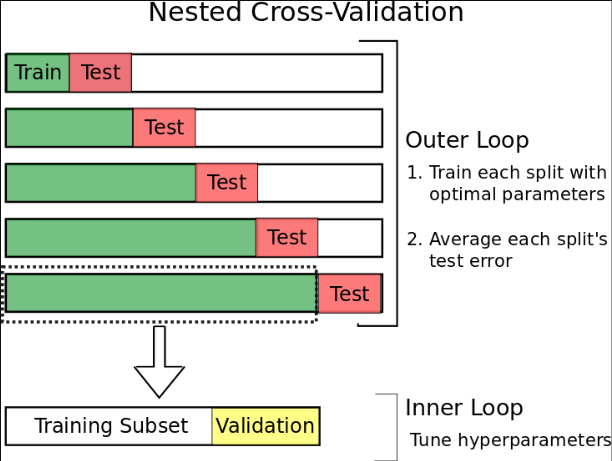